# The Sparks Foundation Internship

# Explorartory Data Analysis on dataset " Indian Premier League"
Saswata Paul Choudhury

# Data Exploration & visualization:

In [167]:
match<-read.csv("C:/Users/user/Desktop/spark/matches.csv", stringsAsFactors=FALSE,na.strings=c("","NA"))

In [137]:
head(match)

id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NA
3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NA
4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NA
5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NA,NA,NA
6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NA


In [179]:
deliveries<-read.csv("C:/Users/user/Desktop/spark/deliveries.csv",stringsAsFactors=FALSE ,na.strings=c("","NA"))

In [140]:
head(deliveries)

match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NA,NA
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NA,NA
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NA,NA,NA
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NA,NA,NA
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NA,NA,NA
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NA,NA,NA


In [4]:
library(plyr)
library(dplyr)


# Total Seaosn in IPL

In [6]:
Total_season<-length(unique(match$season))
Total_season

[1] 12

# Total Matches

In [5]:
match %>% summarise(match_counr=n())

match_counr
756


# Domination Venue for certain team

In [192]:
head(match%>% filter(result !="no result") %>% group_by(winner,city ) %>% summarise(win=n()) %>% arrange(desc(win)))#n() is for row count


winner,city,win
Mumbai Indians,Mumbai,53
Kolkata Knight Riders,Kolkata,45
Chennai Super Kings,Chennai,40
Rajasthan Royals,Jaipur,32
Royal Challengers Bangalore,Bangalore,30
Sunrisers Hyderabad,Hyderabad,30


From the list we see Mumbaui Indians Munbai.

#  Most Sucessful IPL team

In [193]:
library(ggplot2)

In [7]:
match %>% group_by(winner) %>% summarise(wins=n()) %>% filter(wins==max(wins))

winner,wins
Mumbai Indians,109


In [9]:
# plotiing a graph

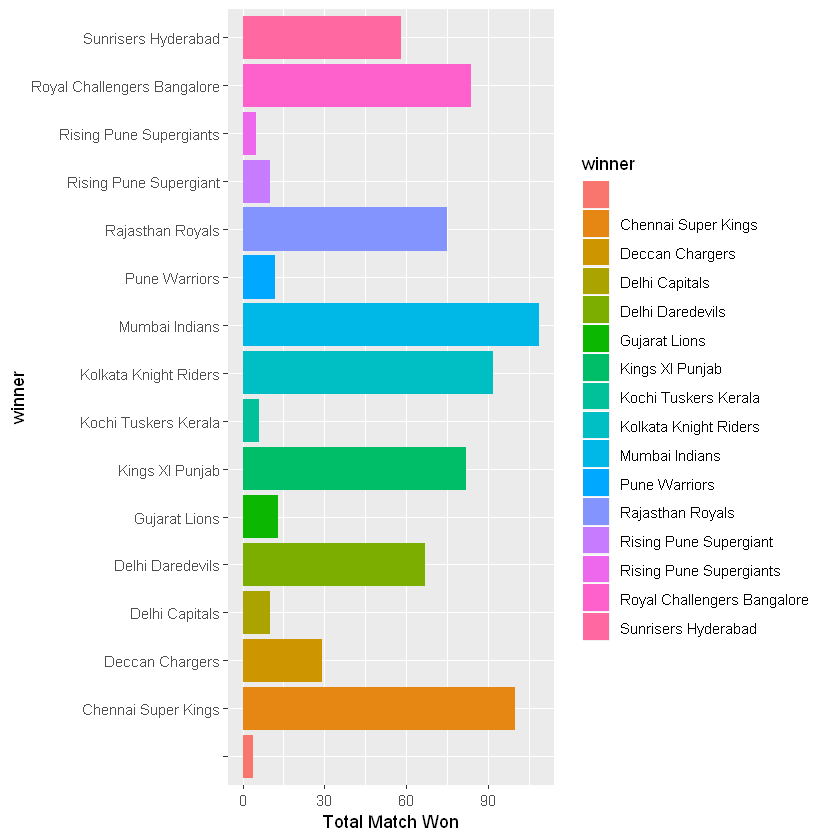

In [10]:
match %>% group_by(winner) %>% summarise(wins=n()) %>% ggplot(aes(x=winner,y=wins, fill=winner))+geom_bar(stat="identity")+
coord_flip()+scale_y_continuous("Total Match Won")

# Most Number of time "Man of the Match awarded" Till now:

In [14]:
library(tidyr)



In [12]:
MOM<-match%>% filter(result !='no result') %>% group_by(player_of_match) %>% summarise(win=n() ) %>% arrange(desc(win))#n() is for row count
head(MOM)

player_of_match,win
CH Gayle,21
AB de Villiers,20
DA Warner,17
MS Dhoni,17
RG Sharma,17
YK Pathan,16


CH Gayle is awarded most man of the match award

#  Season with most number of matches

In [16]:
match %>% group_by (season) %>% summarise(Total_match=n()) %>% filter (Total_match==max(Total_match))

season,Total_match
2013,76


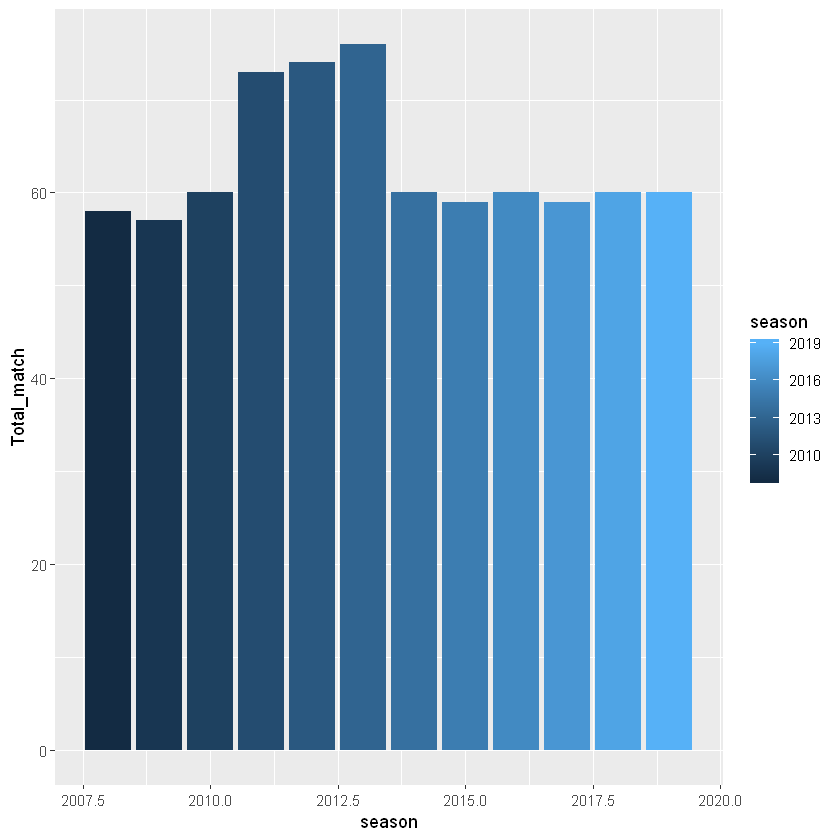

In [17]:
match %>% group_by (season) %>% summarise(Total_match=n()) %>% ggplot(aes(season, Total_match,fill=season))+geom_bar(stat='identity')

# Which Team had won by maximum runs?

In [18]:
max_runs=match[which.max(match$win_by_runs),]
max_runs %>% select('winner','win_by_runs','season')

,winner,win_by_runs,season
44,Mumbai Indians,146,2017


# Which Team had won by maximum wicket?

In [19]:
match %>% filter(win_by_wickets==max(win_by_wickets)) %>% select('winner','win_by_wickets','season')

winner,win_by_wickets,season
Kolkata Knight Riders,10,2017
Kings XI Punjab,10,2017
Deccan Chargers,10,2008
Delhi Daredevils,10,2009
Royal Challengers Bangalore,10,2010
Rajasthan Royals,10,2011
Mumbai Indians,10,2012
Chennai Super Kings,10,2013
Royal Challengers Bangalore,10,2015
Sunrisers Hyderabad,10,2016


# Which team won by minimum run?

In [20]:
match %>% filter(win_by_runs !=0) %>% filter(win_by_runs==min(win_by_runs)) %>% select('winner','win_by_runs','season')

winner,win_by_runs,season
Mumbai Indians,1,2017
Kings XI Punjab,1,2008
Kings XI Punjab,1,2009
Delhi Daredevils,1,2012
Mumbai Indians,1,2012
Chennai Super Kings,1,2015
Gujarat Lions,1,2016
Royal Challengers Bangalore,1,2016
Royal Challengers Bangalore,1,2019
Mumbai Indians,1,2019


# Which team won by minimum wicket?

In [21]:
match %>% filter(win_by_wickets !=0) %>% filter(win_by_wickets==min(win_by_wickets)) %>% select('winner','win_by_wickets','season')

winner,win_by_wickets,season
Kolkata Knight Riders,1,2015
Chennai Super Kings,1,2018
Sunrisers Hyderabad,1,2018


# Impact of toss winning on a match

In [22]:
y=0
n=0
    for(i in seq(1, nrow(match)))
        {
         if (match$toss_winner[i]==match$winner[i])
        y=y+1
        else
            n=n+1
    }
if(y>= n)
    {
    print(paste("Yes, Toss-winning has an impact of winning a game"))
    print(paste("Matches won by toss winners are:",y,"& Total matches:",nrow(match)))
}else
    {
    print(paste("no, Toss-winning didn't help in winning"))
    print(paste("Matches won by other teams are:",n,"& Total matches:",nrow(match)))
}

[1] "Yes, Toss-winning has an impact of winning a game"
[1] "Matches won by toss winners are: 393 & Total matches: 756"


In [23]:
winning=c(y,n)
teams=c("toss_win&game_win","toss_win&game_lost")
df=data.frame(teams,winning,stringAsFactors=F)

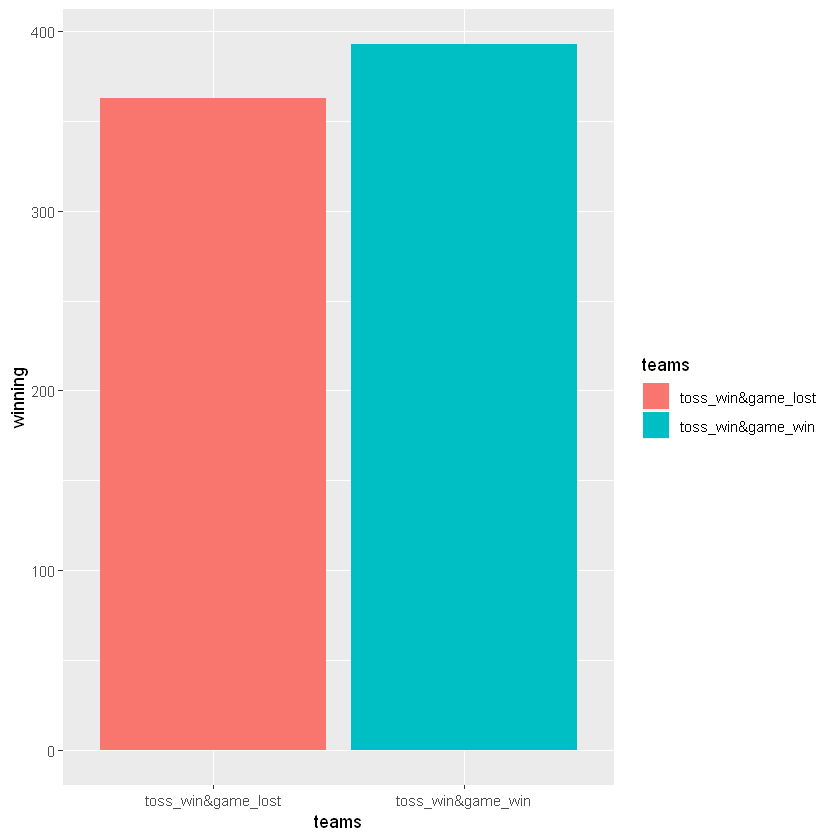

In [24]:
ggplot(df)+geom_bar(aes(teams,winning,fill=teams),stat='identity')

# When team batting first wins

In [46]:
library(gridExtra)

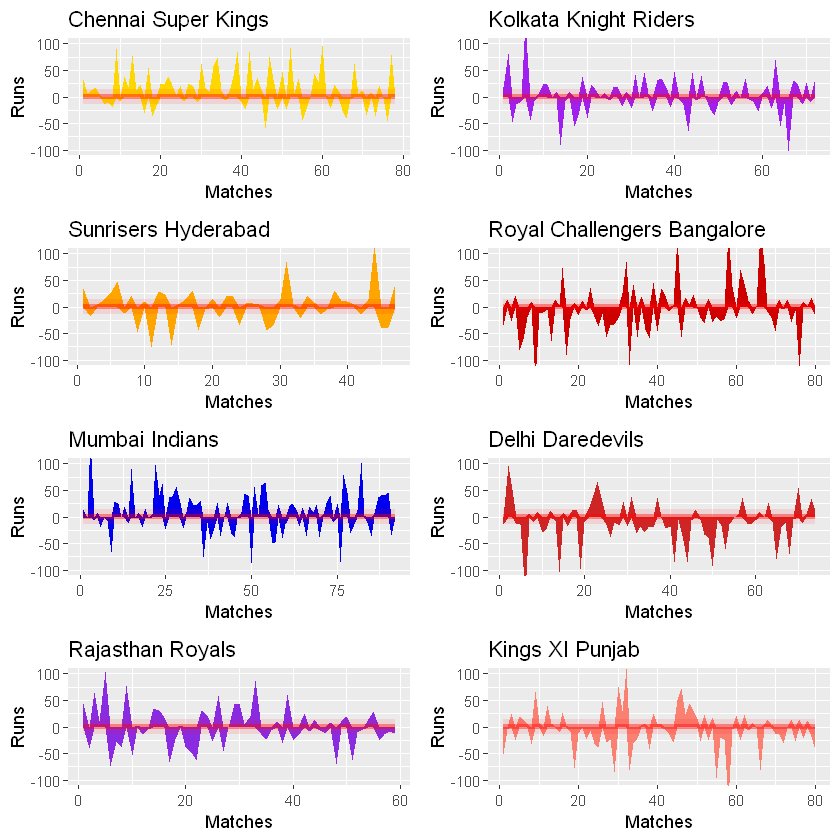

In [56]:
match[which(as.character(match$team2)==as.character(match$winner)),"loser"]<- match[which(as.character(match$team2)==as.character(match$winner)),"team1"]
match[which(as.character(match$team1)==as.character(match$winner)),"loser"]<- match[which(as.character(match$team1)==as.character(match$winner)),"team2"]


matches1<-match[match$win_by_runs!=0,]
closeness<-function(x,y = "gold" ){
  data1<-matches1[matches1$winner==x|matches1$loser==x,]
  data1[data1$loser==x,"win_by_runs"]<- -data1[data1$loser==x,"win_by_runs"]
  ggplot(data1,aes(1:nrow(data1),win_by_runs))+ geom_area(fill=y)+ggtitle(x)+
    ylab("Runs")+ xlab("Matches")+ geom_ribbon(aes(ymin=-5, ymax=5),fill="red",alpha=0.4) +geom_ribbon(aes(ymin=-15, ymax=15),fill="red",alpha=0.1) +
    guides(fill=FALSE)+scale_alpha(guide = 'none')+coord_cartesian(ylim = c(-100, 100)) 
}
a<-closeness("Chennai Super Kings")
b<-closeness("Kolkata Knight Riders","purple")
c<-closeness("Sunrisers Hyderabad","orange")
d<-closeness("Mumbai Indians","blue2")
e<-closeness("Royal Challengers Bangalore","red3")
f<-closeness("Delhi Daredevils","firebrick3")
g<-closeness("Rajasthan Royals","blueviolet")
h<-closeness("Kings XI Punjab","salmon")
grid.arrange(a,b,c,e,d,f,g,h,ncol=2)

# Matches played in different cities

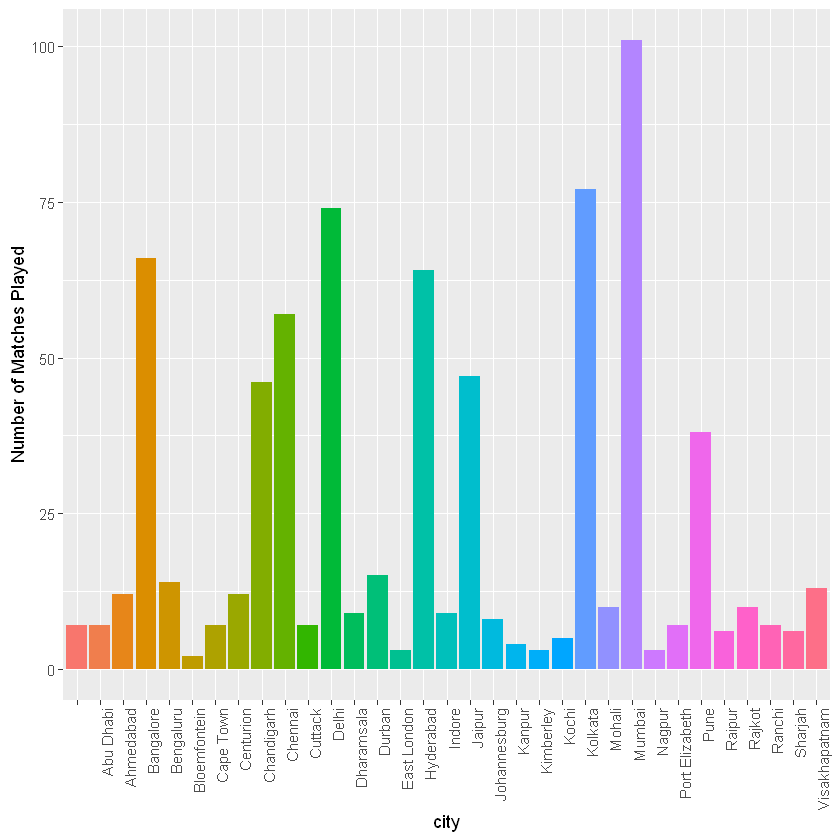

In [34]:
ggplot(match[which(!is.na(match$city)),],aes(city,fill= city,rm.na=T)) +geom_bar() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))+ 
ylab("Number of Matches Played") +
guides(fill=FALSE)


# Number of matches played in different stadiums

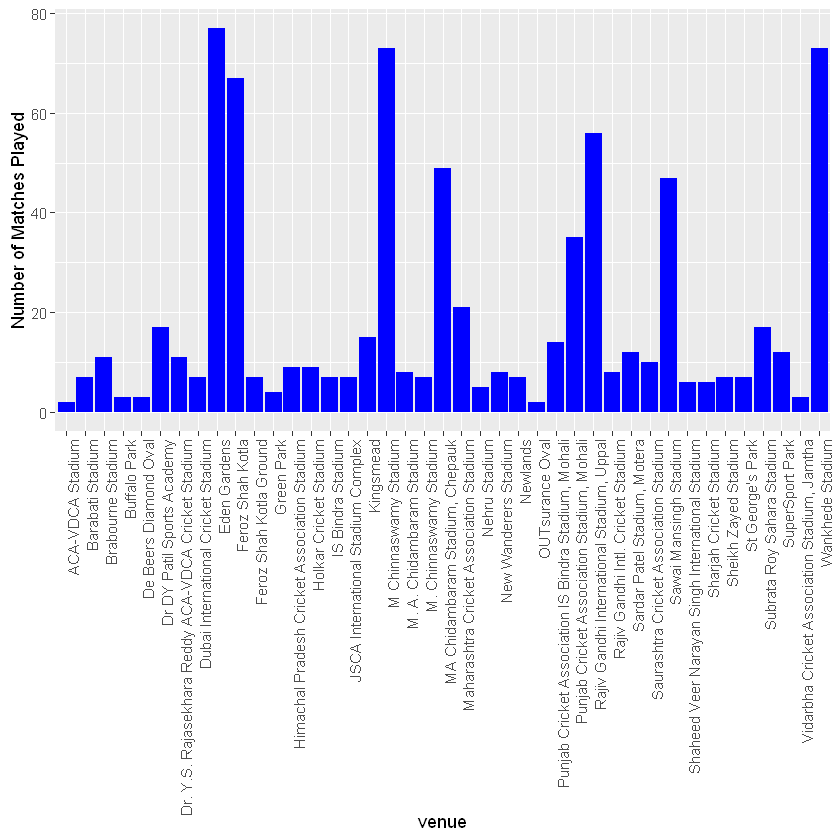

In [35]:
ggplot(match,aes(venue, rm.na=T)) +geom_bar(fill=factor("blue")) +
theme(axis.text.x = element_text(angle = 90, hjust = 1))+ 
ylab("Number of Matches Played")

# Most number of runs

In [72]:
deliveries %>% 
    group_by(batsman) %>% 
    summarise(Runs = sum(batsman_runs)) %>% 
    arrange(-Runs) %>% 
    head(15)

batsman,Runs
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428
G Gambhir,4223


# Highest score by a batsman in a match

In [113]:
top_scores =deliveries %>% 
    group_by(batsman, match_id) %>% 
    summarise(runs = sum(batsman_runs)) %>% 
    arrange(-runs) %>%
    select(batsman, runs) %>% 
    head(10) %>%
    ungroup() %>%
    mutate(Rank = as.factor(1:10))

In [114]:
top_scores

batsman,runs,Rank
CH Gayle,175,1
BB McCullum,158,2
AB de Villiers,133,3
RR Pant,130,4
AB de Villiers,129,5
CH Gayle,128,6
M Vijay,127,7
DA Warner,126,8
V Sehwag,122,9
SR Watson,121,10


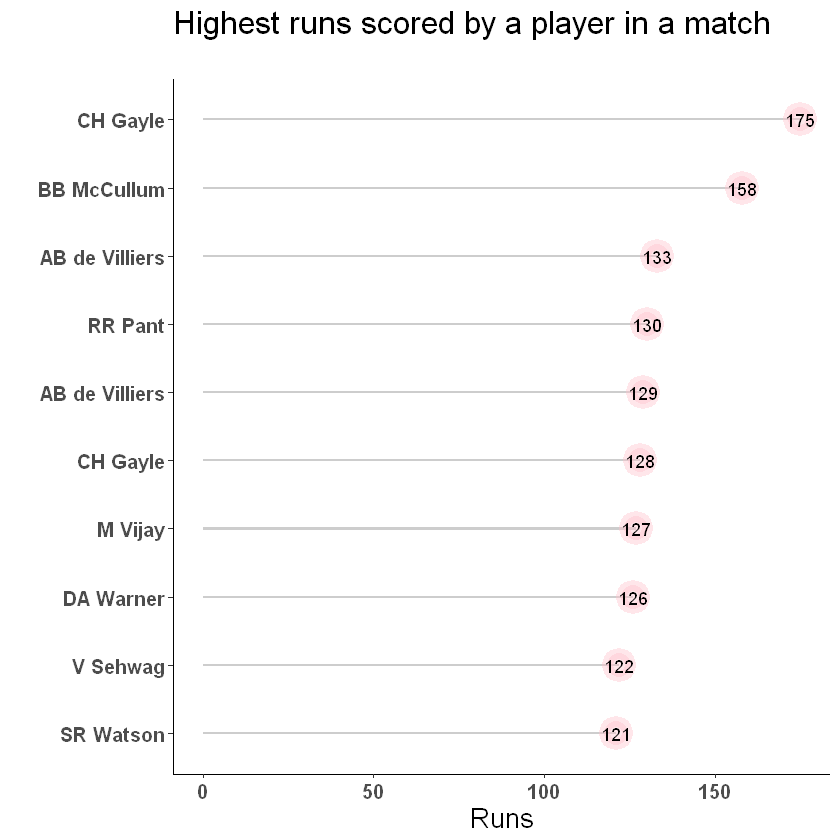

In [83]:
ggplot(top_scores)+
    aes(reorder(Rank, runs), runs)+
    geom_bar(stat = "identity", width = 0.03, alpha = 0.3)+
    geom_point(size=7, color="pink", alpha=0.4, shape=20, stroke=5)+
    scale_x_discrete(labels = top_scores[order(top_scores$runs),]$batsman) +
    theme_classic()+
    geom_text(aes(Rank, runs, label = runs))+
    labs(x = "", y = "Runs", title = "Highest runs scored by a player in a match", subtitle = "")+
    coord_flip()+
    theme(axis.text = element_text(size = 12, face = "bold"), title  =  element_text(size = 16))

# Teams scoring highest in matches

In [123]:
team2 = deliveries %>% 
    group_by(match_id, batting_team) %>%
    summarise(runs = sum(total_runs)) %>%
    arrange(-runs) %>%
    head(10) %>%
    ungroup() %>% 
    mutate(Rank = as.factor(1:10))

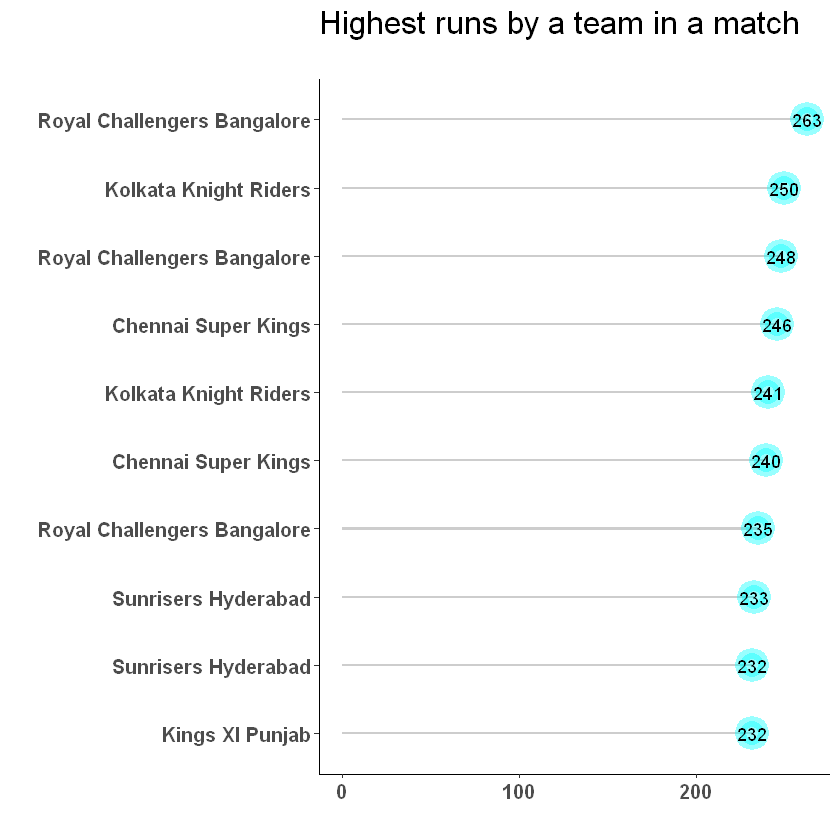

In [124]:
ggplot(team2)+
    aes(reorder(Rank, runs), runs)+
    geom_bar(stat = "identity", width = 0.03, alpha = 0.3)+
    geom_point(size=7, color="cyan", alpha=0.4, shape=20, stroke=5)+
    scale_x_discrete(labels = team2[order(team2$runs),]$batting_team) +
    theme_classic()+
    geom_text(aes(Rank, runs, label = runs))+
    labs(x = "", y = "", title = "Highest runs by a team in a match", subtitle = "")+
    coord_flip()+
    theme(axis.text = element_text(size = 12, face = "bold"), title  =  element_text(size = 16))


# Overall toss desicion

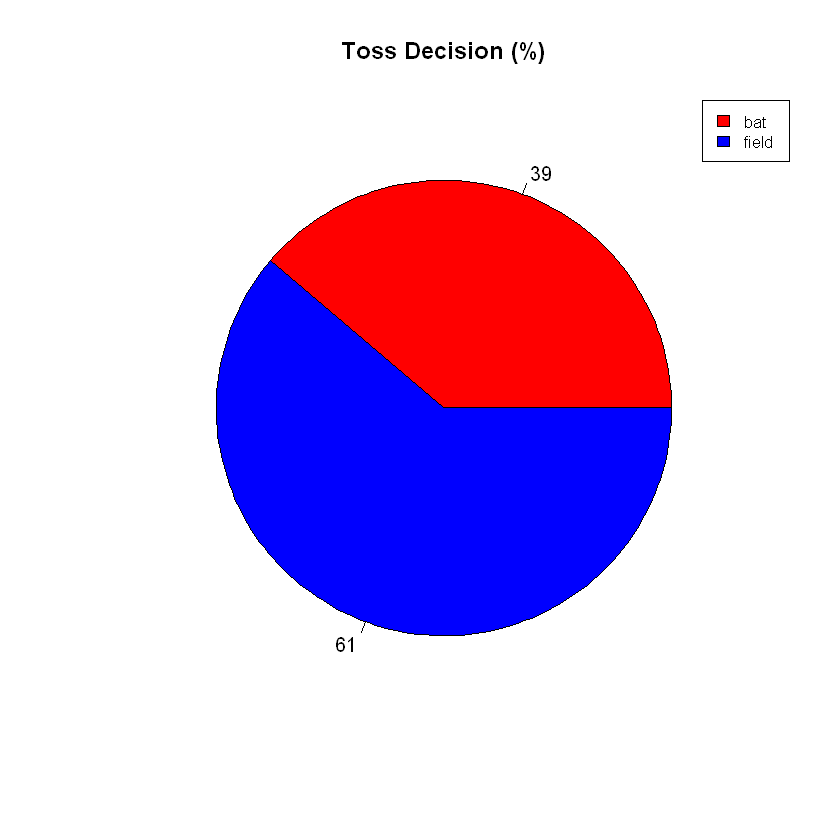

In [126]:
toss = as.data.frame(table(match$toss_decision))
toss = mutate(toss, percentage = (Freq/sum(Freq))*100)
pie(toss$Freq, labels = round(toss$percentage), main = "Toss Decision (%)", col = c("red", "blue"))
legend("topright", c("bat","field"), cex = 0.8, fill = c("red", "blue"))

In [169]:
table(match$toss_decision)


  bat field 
  293   463 

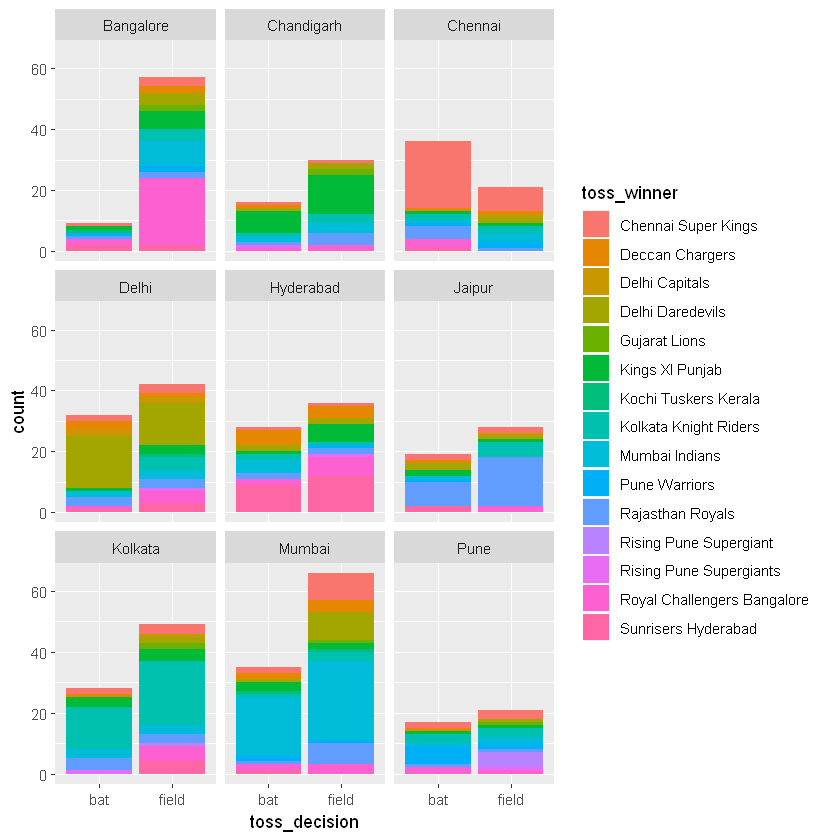

In [171]:
match%>%filter(city=="Mumbai"|city=="Bangalore"|city=="Delhi"|city=="Chennai"|city=="Kolkata"|city=="Jaipur"|
               city=="Hyderabad"|city=="Chandigarh"|city=="Pune")%>%ggplot()+
geom_bar(aes(x=toss_decision,fill=toss_winner))+facet_wrap(~city)

# IPL winners

In [129]:
match %>%
    select(season, id, winner) %>%
    group_by(season) %>%
    slice(which.max(id)) %>%
    select(season, winner) 

season,winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


# Highest total individual run against a team: 

In [128]:
deliveries %>% 
    group_by(bowling_team, batsman) %>% 
    summarise(total_runs = sum(batsman_runs))%>%
    arrange(-total_runs) %>% 
    na.omit() %>%
    group_by(bowling_team) %>%
    slice(which.max(total_runs))

bowling_team,batsman,total_runs
Chennai Super Kings,V Kohli,749
Deccan Chargers,R Dravid,339
Delhi Capitals,AD Russell,118
Delhi Daredevils,V Kohli,763
Gujarat Lions,DA Warner,336
Kings XI Punjab,DA Warner,833
Kochi Tuskers Kerala,SR Tendulkar,100
Kolkata Knight Riders,DA Warner,835
Mumbai Indians,SK Raina,824
Pune Warriors,CH Gayle,383


# Most Maiden overs 

In [130]:
maidens <- as.data.frame(deliveries %>% 
                            group_by(bowler, match_id, over) %>%
                            summarise(runs = sum(total_runs)) %>% 
                            filter(runs == 0) %>%
                            ungroup() %>% 
                            select(bowler) %>% 
                            table()) %>%
    arrange(-Freq)

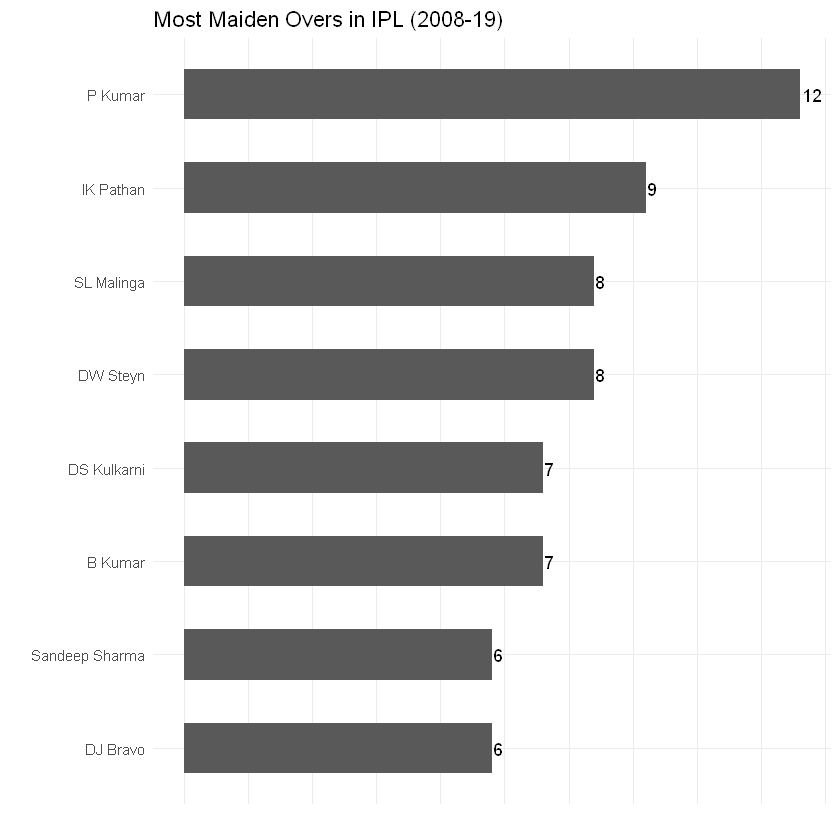

In [131]:
colnames(maidens) = c ("Bowler", "No")
maidens %>%
    filter(No > 5) %>%
    ggplot() +
    aes(reorder(Bowler, No), No) + 
    geom_bar(stat = "identity", width = 0.54) +
    geom_text(aes(Bowler, No, label = No), hjust = -0.1)+
    theme_minimal() + 
    coord_flip()+ 
    theme(axis.text.x =  element_blank())+
    labs(x = "", y = "", title = "Most Maiden Overs in IPL (2008-19)")

# Most wicket takers (overall)

In [142]:
deliveries %>%
    filter(dismissal_kind != "run out") %>%
    group_by(bowler) %>% 
    summarise(wickets = sum(table(dismissal_kind))) %>%
    arrange(-wickets) %>% 
  head(15)

bowler,wickets
SL Malinga,170
A Mishra,156
Harbhajan Singh,150
PP Chawla,149
DJ Bravo,147
B Kumar,133
R Ashwin,125
SP Narine,122
UT Yadav,119
RA Jadeja,108


# Bolwers taking more than 5 wickets

In [143]:
deliveries %>%
    filter(dismissal_kind != "run out") %>%
    group_by(bowler, match_id) %>% 
    summarise(wickets = sum(table(dismissal_kind))) %>%
    arrange(-wickets) %>% 
    filter(wickets >= 5) %>% 
    select(bowler, wickets) %>%
    table() 

                 wickets
bowler            5 6
  A Joseph        0 1
  A Kumble        1 0
  A Mishra        1 0
  A Zampa         0 1
  AD Mascarenhas  1 0
  AJ Tye          1 0
  AS Rajpoot      1 0
  B Kumar         1 0
  Harbhajan Singh 1 0
  I Sharma        1 0
  JD Unadkat      2 0
  JP Faulkner     2 0
  L Balaji        1 0
  MM Patel        1 0
  RA Jadeja       1 0
  SL Malinga      1 0
  Sohail Tanvir   0 1
  SP Narine       1 0

# Most dismissed batsman by a bowler

In [144]:
deliveries %>%
    filter(dismissal_kind != "run out") %>%
    group_by(bowler, batsman) %>% 
    summarise(total_dismissed = sum(table(dismissal_kind))) %>%
    arrange(-total_dismissed) %>% 
    head(10)

bowler,batsman,total_dismissed
Z Khan,MS Dhoni,7
A Mishra,RG Sharma,6
A Nehra,V Kohli,6
B Kumar,AM Rahane,6
B Kumar,PA Patel,6
MM Sharma,AT Rayudu,6
PP Chawla,AT Rayudu,6
PP Ojha,MS Dhoni,6
R Ashwin,RV Uthappa,6
R Vinay Kumar,RG Sharma,6


# Batsman with most runs againt a single bowler

In [145]:
deliveries %>% 
    group_by(batsman, bowler) %>% 
    summarise(runs = sum(table(batsman_runs)))%>%
    arrange(-runs) %>% 
  head(10) 

batsman,bowler,runs
SK Raina,Harbhajan Singh,125
S Dhawan,Harbhajan Singh,123
V Kohli,R Ashwin,119
RG Sharma,PP Chawla,113
RG Sharma,SP Narine,111
CH Gayle,Harbhajan Singh,103
V Kohli,A Mishra,103
SK Raina,PP Chawla,102
MS Dhoni,PP Ojha,100
V Kohli,RA Jadeja,99


# Batsman with most dismissal:

In [147]:
deliveries %>% 
    group_by(player_dismissed, dismissal_kind) %>% 
    summarise(total = sum(table(dismissal_kind)))%>%
    arrange(-total) %>% 
    na.omit() %>%
    group_by(dismissal_kind) %>%
    slice(which.max(total)) 

player_dismissed,dismissal_kind,total
SR Watson,bowled,32
SK Raina,caught,112
SK Raina,caught and bowled,7
DA Warner,hit wicket,1
BB McCullum,lbw,16
A Mishra,obstructing the field,1
Harbhajan Singh,retired hurt,2
G Gambhir,run out,16
SK Raina,stumped,8


# Bowlers with most dismissal type:

In [148]:
deliveries %>% 
    group_by(bowler, dismissal_kind) %>% 
    summarise(total = sum(table(dismissal_kind)))%>%
    arrange(-total) %>% 
    na.omit() %>%
    group_by(dismissal_kind) %>%
    slice(which.max(total)) 

bowler,dismissal_kind,total
SL Malinga,bowled,63
DJ Bravo,caught,113
Harbhajan Singh,caught and bowled,10
S Sreesanth,hit wicket,2
PP Chawla,lbw,16
K Ahmed,obstructing the field,1
BB Sran,retired hurt,1
R Vinay Kumar,run out,22
A Mishra,stumped,26


# Highest run scorer in IPL:

In [149]:
deliveries %>% 
    group_by(batting_team, batsman) %>% 
    summarise(runs = sum(batsman_runs)) %>% 
    arrange(-runs) %>%
    group_by(batting_team) %>%
    slice(which.max(runs))

batting_team,batsman,runs
Chennai Super Kings,SK Raina,4574
Deccan Chargers,AC Gilchrist,1220
Delhi Capitals,S Dhawan,542
Delhi Daredevils,V Sehwag,2174
Gujarat Lions,SK Raina,841
Kings XI Punjab,SE Marsh,2489
Kochi Tuskers Kerala,BB McCullum,357
Kolkata Knight Riders,G Gambhir,3035
Mumbai Indians,RG Sharma,3744
Pune Warriors,RV Uthappa,1103


# Highest wicket taker teams:

In [154]:
x<-deliveries%>%
    filter(dismissal_kind != "run out") %>%
    group_by(bowling_team, bowler) %>% 
    summarise(wickets = sum(table(dismissal_kind))) %>%
    arrange(-wickets) %>% 
    group_by(bowling_team) %>% 
    slice(which.max(wickets))

In [155]:
x

bowling_team,bowler,wickets
Chennai Super Kings,DJ Bravo,104
Deccan Chargers,PP Ojha,60
Delhi Capitals,K Rabada,25
Delhi Daredevils,A Mishra,86
Gujarat Lions,DS Kulkarni,21
Kings XI Punjab,PP Chawla,84
Kochi Tuskers Kerala,RP Singh,13
Kolkata Knight Riders,SP Narine,122
Mumbai Indians,SL Malinga,170
Pune Warriors,R Sharma,34


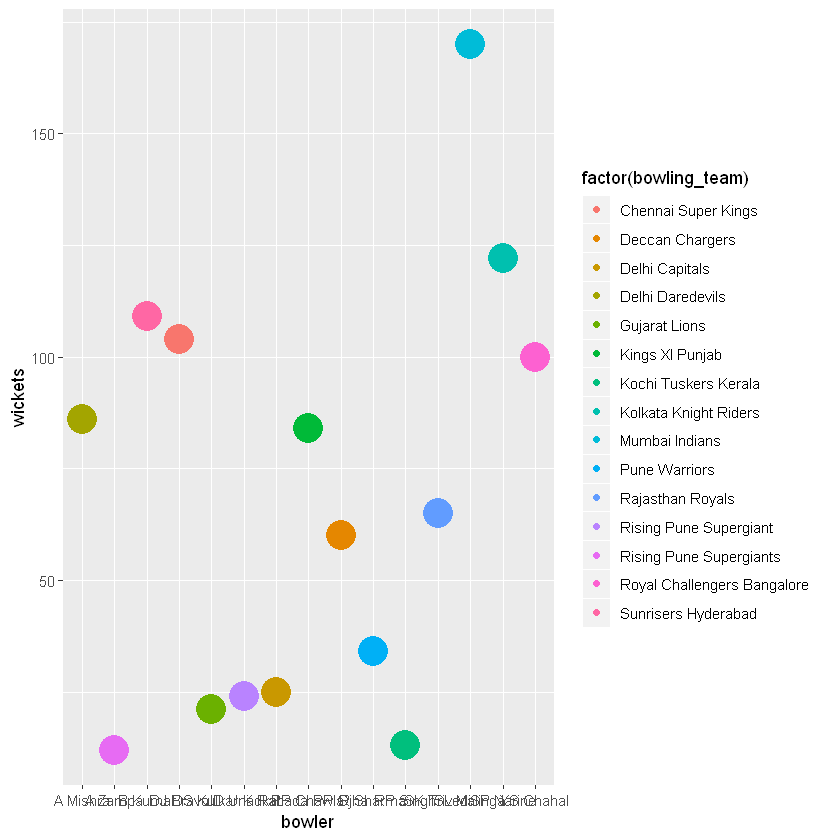

In [164]:
ggplot(x,aes(bowler,wickets,col=factor(bowling_team),size=I(8)))+geom_point()

# plaers with most catch, runout and stumped

In [153]:
deliveries %>%
    group_by(dismissal_kind, fielder) %>% 
    summarise(total = sum(table(dismissal_kind))) %>%
    arrange(-total) %>% 
    group_by(dismissal_kind) %>% 
    slice(which.max(total)) %>% na.omit()

dismissal_kind,fielder,total
caught,KD Karthik,109
run out,MS Dhoni,23
stumped,MS Dhoni,38
